# Homework 1

## FINM 37400 - 2025

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

### Data

This homework uses the data file, `treasury_quotes_2024-10-31`.

The problems below analyze the nominal, (rather than the TIPS,) Treasury issues. Accordingly, you should filter out all rows with `type` `TIPS Note` or `TIPS bond`.

***

# 1. Discount Rates

Use the data in the `selected quotes` tab.

Note:
* The selected treasuries are at nearly six-month intervals. 
* If you prefer, approximate that they mature at perfect 6-month intervals. 

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [140]:
selected_quotes_df = pd.read_excel("../data/treasury_quotes_2024-10-31.xlsx", sheet_name="selected quotes")
selected_quotes_df

,KYTREASNO,type,quote date,issue date,maturity date,ttm,accrual fraction,cpn rate,bid,ask,price,accrued int,dirty price,ytm
0,208042,note,2024-10-31,2023-04-30,2025-04-30,0.495551,0,3.875,99.712500,99.722203,99.717351,0,99.717351,0.044933
1,208129,note,2024-10-31,2023-10-31,2025-10-31,0.999316,0,5.000,100.641406,100.660819,100.651113,0,100.651113,0.043311
2,208213,note,2024-10-31,2024-04-30,2026-04-30,1.494867,0,4.875,100.929688,100.960938,100.945312,0,100.945312,0.042327
3,208302,note,2024-10-31,2024-10-31,2026-10-31,1.998631,0,4.125,99.933594,99.941406,99.937500,0,99.937500,0.041611
4,207875,note,2024-10-31,2022-04-30,2027-04-30,2.494182,0,2.750,96.750000,96.781250,96.765625,0,96.765625,0.041346
5,207960,note,2024-10-31,2022-10-31,2027-10-31,2.997947,0,4.125,99.992188,100.015625,100.003906,0,100.003906,0.041268
6,208044,note,2024-10-31,2023-04-30,2028-04-30,3.496235,0,3.500,97.902344,97.941406,97.921875,0,97.921875,0.041487
7,208132,note,2024-10-31,2023-10-31,2028-10-31,4.000000,0,4.875,102.585938,102.621094,102.603516,0,102.603516,0.041623
8,208216,note,2024-10-31,2024-04-30,2029-04-30,4.495551,0,4.625,101.894531,101.929688,101.912109,0,101.912109,0.041590
9,208305,note,2024-10-31,2024-10-31,2029-10-31,4.999316,0,4.125,99.890625,99.898438,99.894531,0,99.894531,0.041496


### 1.1.

Create the cashflow matrix, $\textbf{C}$, where each rows is a Treasury issue, each column is a date, and each entry is the cash paid on a (normalized) face value of \$100.

In [141]:

import pandas as pd

face_value = 100
annual_payment_freq = 2

def payment_dates(issue_date, maturity_date, freq):
    current_date = pd.to_datetime(issue_date)
    maturity_date = pd.to_datetime(maturity_date)
    dates = pd.date_range(start=current_date, end=maturity_date, freq='6ME')
    return dates

def cashflows(row):
    dates = payment_dates(row['issue date'], row["maturity date"], annual_payment_freq)
    cashflows = []
    coupon = (row["cpn rate"] / 100) * face_value / annual_payment_freq

    for date in dates:
        if date == pd.to_datetime(row['maturity date']):
            cashflows.append(coupon + face_value)
        else:
            cashflows.append(coupon)

    return pd.Series(data=cashflows, index=dates)

cashflow_matrix = pd.DataFrame()

for _, bond in selected_quotes_df.iterrows():
    bond_cashflows = cashflows(bond)
    cashflow_matrix = pd.concat([cashflow_matrix, bond_cashflows], axis=1)

cashflow_matrix.fillna(0, inplace=True)
cashflow_matrix.columns = selected_quotes_df['KYTREASNO']

cashflow_matrix = cashflow_matrix.transpose()
cashflow_matrix.head()

,2023-04-30 00:00:00,2023-10-31 00:00:00,2024-04-30 00:00:00,2024-10-31 00:00:00,2025-04-30 00:00:00,2025-10-31 00:00:00,2026-04-30 00:00:00,2026-10-31 00:00:00,2022-04-30 00:00:00,2022-10-31 00:00:00,2027-04-30 00:00:00,2027-10-31 00:00:00,2028-04-30 00:00:00,2028-10-31 00:00:00,2029-04-30 00:00:00,2029-10-31 00:00:00,2030-04-30 00:00:00,2030-10-31 00:00:00,2031-04-30 00:00:00,2031-10-31 00:00:00
KYTREASNO,,,,,,,,,,,,,,,,,,,,
208042,1.9375,1.9375,1.9375,1.9375,101.9375,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208129,0.0000,2.5000,2.5000,2.5000,2.5000,102.5000,0.0000,0.0000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208213,0.0000,0.0000,2.4375,2.4375,2.4375,2.4375,102.4375,0.0000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208302,0.0000,0.0000,0.0000,2.0625,2.0625,2.0625,2.0625,102.0625,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207875,1.3750,1.3750,1.3750,1.3750,1.3750,1.3750,1.3750,1.3750,1.375,1.375,101.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1.2.

Estimate the spot discount factors that rationalize the market prices of the treasuries. Do this via solving the linear system

$$\textbf{p} = {\textbf{C}}\, \textbf{z}$$

In [142]:
p = selected_quotes_df['dirty price'].values
C = cashflow_matrix.values

z, residuals, rank, s = np.linalg.lstsq(C, p, rcond=None)

In [143]:
discount_factors = pd.Series(z, index=cashflow_matrix.columns).sort_index()
discount_factors = discount_factors[6:] #slicing out data for the past
discount_factors

2025-04-30 00:00:00    0.967336
2025-10-31 00:00:00    0.945998
2026-04-30 00:00:00    0.930675
2026-10-31 00:00:00    0.917326
2027-04-30 00:00:00    0.895264
2027-10-31 00:00:00    0.873643
2028-04-30 00:00:00    0.857413
2028-10-31 00:00:00    0.837558
2029-04-30 00:00:00    0.824012
2029-10-31 00:00:00    0.811717
2030-04-30 00:00:00    0.787920
2030-10-31 00:00:00    0.769147
2031-04-30 00:00:00    0.755494
2031-10-31 00:00:00    0.744179
dtype: float64

### 1.3.

Plot the time-to-maturity on the horizontal axis. On the vertical axis, plot the...
* discount factors

Make another plot, this time with the vertical axis displaying the
* semiannually compounded discount rates
* continuously compounded discount rates

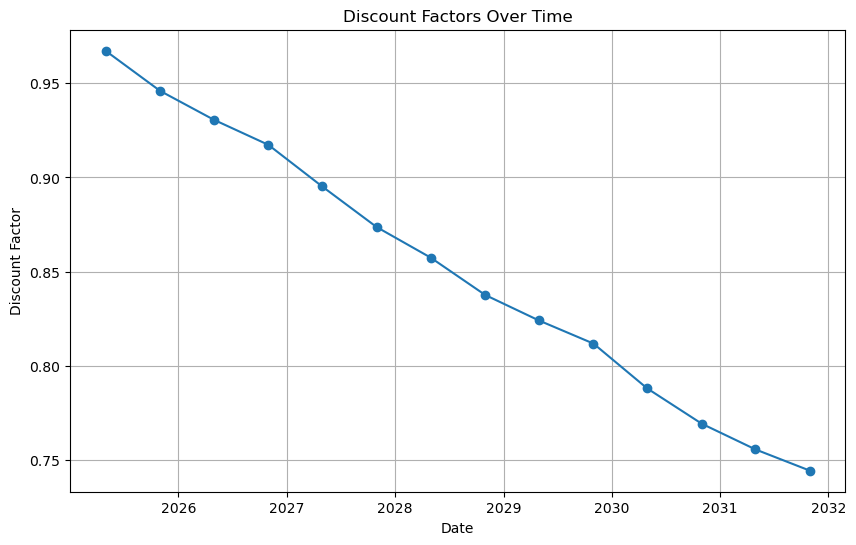

In [144]:
plt.figure(figsize=(10, 6))
plt.plot(discount_factors.index, discount_factors.values, marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Discount Factor')
plt.title('Discount Factors Over Time')
plt.grid(True)
plt.show()

In [145]:
time_to_maturity = np.array([.5 + i * 0.5 for i in range(len(discount_factors))])
semi_annual_rate = 2 / time_to_maturity * (1 / discount_factors.values - 1)
continuous_rate = -np.log(discount_factors.values ) / time_to_maturity

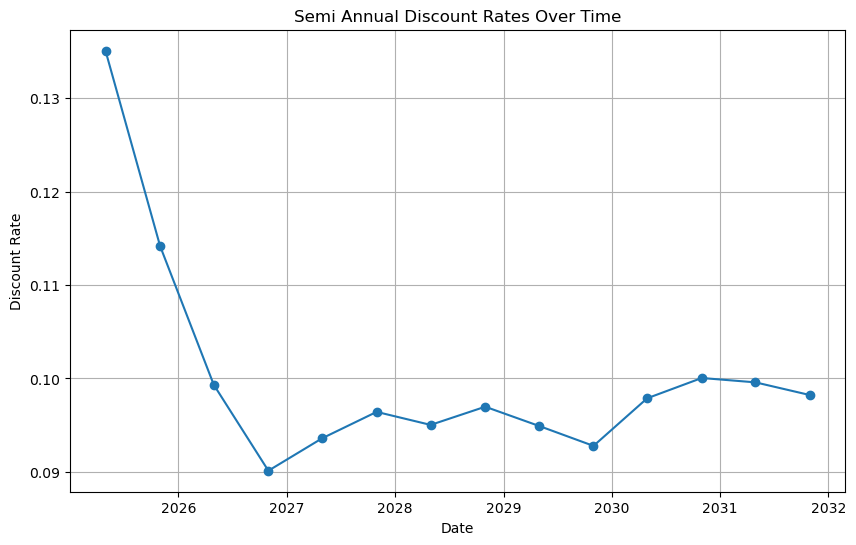

In [146]:
plt.figure(figsize=(10, 6))
plt.plot(discount_factors.index, semi_annual_rate, marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Discount Rate')
plt.title('Semi Annual Discount Rates Over Time')
plt.grid(True)
plt.show()

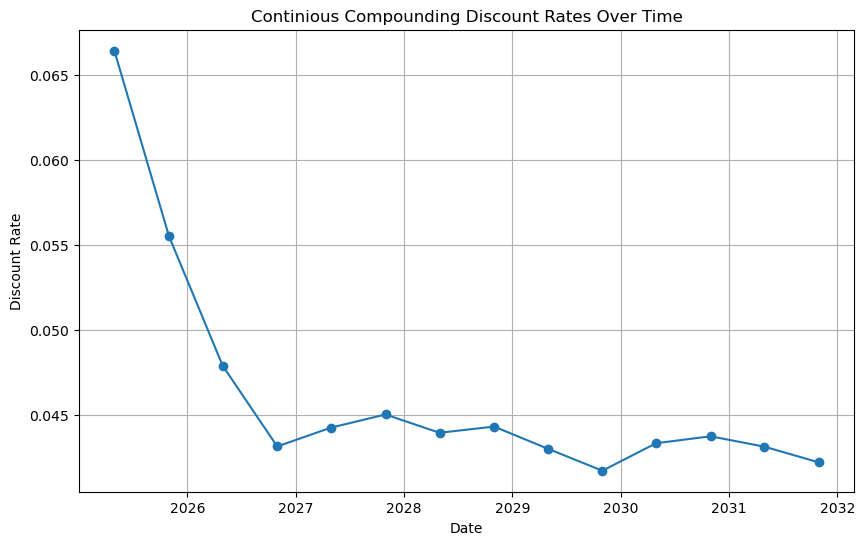

In [147]:
plt.figure(figsize=(10, 6))
plt.plot(discount_factors.index, continuous_rate, marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Discount Rate')
plt.title('Continious Compounding Discount Rates Over Time')
plt.grid(True)
plt.show()

### 1.4.

Suppose that all discount rates and all coupon rates go up by 0.5\%. 

Calculate the new price of each of the treasury securities, using present value pricing.

***

# 2. Estimating the Discount Curve with Real Data

Use the data in the `quotes` tab.

### 2.1. Map Cashflows

Construct the cashflow matrix.

Given the unfiltered data set, you will need to make a few modeling choices to do this...
* eliminate any treasury that does not report YTM or that reports a negative YTM.
* assume notes and bonds pay coupons every six months, going backward from the date of maturity.

Make other reasonable modeling assumptions as needed.

Report:
* head and tail rows of the dataframe, $\textbf{C}$, for instance, using `display()`.

* which date has the most cashflow across all issues?

* which date has the most issues paying a cashflow?

In [148]:
quotes_df = pd.read_excel("../data/treasury_quotes_2024-10-31.xlsx", sheet_name="quotes")

quotes_df = quotes_df[(quotes_df['type'] != 'TIPS Note') & (quotes_df['type'] != 'TIPS bond')]
quotes_df = quotes_df[quotes_df['ytm'] >= 0]

quotes_df

,KYTREASNO,type,quote date,issue date,maturity date,ttm,accrual fraction,cpn rate,bid,ask,price,accrued int,dirty price,ytm
0,208246,bill,2024-10-31,2024-07-09,2024-11-05,0.013689,0.972621,0.000,99.947806,99.947917,99.947861,0.000000,99.947861,0.038463
1,208222,bill,2024-10-31,2024-05-09,2024-11-07,0.019165,0.961670,0.000,99.922356,99.922522,99.922439,0.000000,99.922439,0.040899
2,208247,bill,2024-10-31,2024-07-16,2024-11-12,0.032854,0.934292,0.000,99.857458,99.857764,99.857611,0.000000,99.857611,0.043844
3,208223,bill,2024-10-31,2024-05-16,2024-11-14,0.038330,0.923340,0.000,99.832571,99.832932,99.832751,0.000000,99.832751,0.044151
4,204083,bond,2024-10-31,1994-05-15,2024-11-15,0.041068,0.918478,7.500,100.114004,100.114405,100.114204,3.444293,103.558498,0.045497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,208107,bond,2024-10-31,2023-08-15,2053-08-15,28.788501,0.418478,4.125,93.968750,94.019531,93.994141,0.863111,94.857252,0.044991
443,208149,bond,2024-10-31,2023-11-15,2053-11-15,29.040383,0.918478,4.750,104.281250,104.335938,104.308594,2.181386,106.489980,0.044837
445,208178,bond,2024-10-31,2024-02-15,2054-02-15,29.292266,0.418478,4.250,96.125000,96.171875,96.148438,0.889266,97.037704,0.044873
446,208233,bond,2024-10-31,2024-05-15,2054-05-15,29.535934,0.918478,4.625,102.328125,102.390625,102.359375,2.123981,104.483356,0.044809


In [149]:
cashflow_matrix_quotes = pd.DataFrame()

for _, bond in quotes_df.iterrows():
    bond_cashflows = cashflows(bond)
    cashflow_matrix_quotes = pd.concat([cashflow_matrix_quotes, bond_cashflows], axis=1)

cashflow_matrix_quotes.fillna(0, inplace=True)
cashflow_matrix_quotes.columns = quotes_df['KYTREASNO']

cashflow_matrix_quotes = cashflow_matrix_quotes.transpose()
cashflow_matrix_quotes = cashflow_matrix_quotes[sorted(cashflow_matrix_quotes.columns)]

C = cashflow_matrix_quotes
C

,1994-05-31,1994-11-30,1995-02-28,1995-05-31,1995-08-31,1995-11-30,1996-02-29,1996-05-31,1996-08-31,1996-11-30,...,2051-11-30,2052-02-29,2052-05-31,2052-08-31,2052-11-30,2053-02-28,2053-05-31,2053-08-31,2053-11-30,2054-02-28
KYTREASNO,,,,,,,,,,,,,,,,,,,,,
208246,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000
208222,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000
208247,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000
208223,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000
204083,3.75,3.75,0.0,3.75,0.0,3.75,0.0,3.75,0.0,3.75,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208107,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0000,2.0625,0.0000,2.0625,0.0000,2.0625,0.0000,0.000,0.0000,0.000
208149,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,2.3750,0.0000,2.3750,0.0000,2.3750,0.0000,2.3750,0.000,0.0000,0.000
208178,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0000,2.1250,0.0000,2.1250,0.0000,2.1250,0.0000,2.125,0.0000,0.000


In [150]:
col_with_max_sum = C.sum().idxmax()
col_with_most_non_zero = C.astype(bool).sum().idxmax()

print("Date with the highest sum of cash flows:", col_with_max_sum)
print("Date with the most cash flows:", col_with_most_non_zero)

Date with the highest sum of cash flows: 2025-02-28 00:00:00
Date with the most cash flows: 2024-08-31 00:00:00


### 2.2. OLS

Estimate the discount factors using OLS.

Starting with the cashflow matrix, $C$, create an additional filter to get a subset where every date has at least one maturity, (possibly multiple,) and every issue has its maturity in the cashflow matrix. Call this set of cashflows, $\hat{C}$.

**Report 5 head and tail rows of $\hat{C}$.**

$$\textbf{p} = \hat{\textbf{C}}\,\textbf{z}_{\text{ols}}+\epsilon$$

Plot the time-to-maturity vs discount rates, semiannually compounded.

In [151]:
C_hat = C[C.gt(100).any(axis=1)]
C_hat

,1994-05-31,1994-11-30,1995-02-28,1995-05-31,1995-08-31,1995-11-30,1996-02-29,1996-05-31,1996-08-31,1996-11-30,...,2051-11-30,2052-02-29,2052-05-31,2052-08-31,2052-11-30,2053-02-28,2053-05-31,2053-08-31,2053-11-30,2054-02-28
KYTREASNO,,,,,,,,,,,,,,,,,,,,,
207157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
filtered_quotes_df = quotes_df[quotes_df['KYTREASNO'].isin(C_hat.index)]
p = filtered_quotes_df[['price']]

C_matrix = C_hat.values
p_vector = p.values

z_ols_lstsq, residuals, rank, singular_vals = np.linalg.lstsq(
    C_matrix, 
    p_vector, 
    rcond=None
)

z_ols_lstsq = z_ols_lstsq.flatten()
z_ols_lstsq

array([-1.28785871e-14,  9.57567359e-14,  7.34412531e-14,  4.16333634e-14,
       -1.41497924e-13,  1.63410951e-13, -1.07691633e-14, -3.56797925e-14,
        2.83106871e-15,  1.58761893e-14, -2.49800181e-14,  1.00516817e-13,
        3.70814490e-14, -4.16333634e-17, -6.68215483e-14,  6.72795153e-14,
        4.23272528e-16,  1.37371017e-13,  7.21644966e-15,  4.45754544e-14,
       -4.18554080e-14, -2.90878432e-14,  7.56616991e-14,  1.01887249e-13,
       -1.88737914e-15,  3.31262795e-14,  3.79973830e-14, -1.18793864e-14,
        7.10265180e-14,  6.76125822e-14,  6.45150600e-13,  9.14546217e-14,
        1.61468061e-14, -1.67643677e-14, -1.27575901e-14, -7.74900977e-14,
        5.21804822e-14, -1.38777878e-15, -5.53845164e-14,  2.69784195e-14,
       -1.32116540e-14,  2.29490038e-13,  8.88178420e-16,  5.40817391e-14,
       -1.50435220e-14, -5.12923037e-14, -2.68951528e-14, -3.67622599e-14,
        5.34017275e-14, -7.16119872e-13, -8.88872309e-14,  3.50830476e-14,
        6.50000886e-15, -

In [153]:
discount_factors = pd.Series(z_ols_lstsq, index=C_hat.columns).sort_index()
discount_factors = discount_factors[177:261] #filtering any past data and cutting off zeros at the end

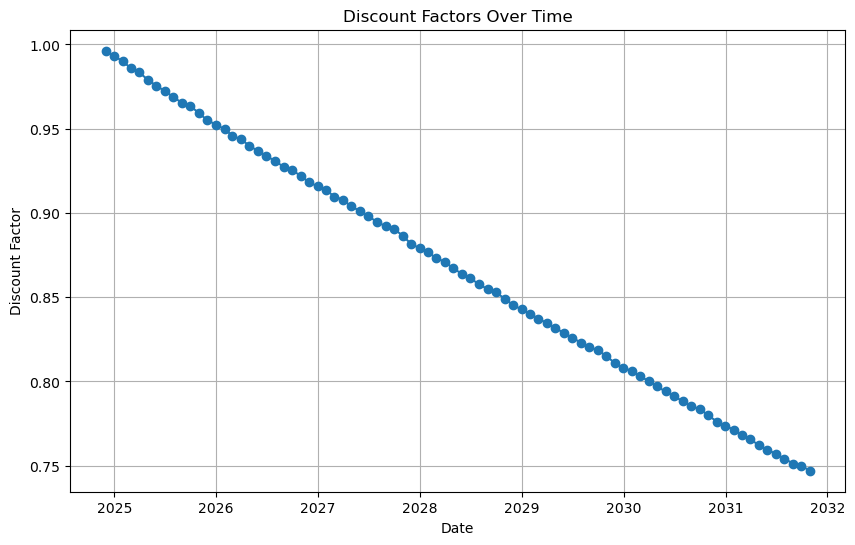

In [154]:
plt.figure(figsize=(10, 6))
plt.plot(discount_factors.index, discount_factors.values, marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Discount Factor')
plt.title('Discount Factors Over Time')
plt.grid(True)
plt.show()

In [155]:
time_to_maturity = np.array([.5 + i * 0.5 for i in range(len(discount_factors))])
semi_annual_rate = 2 / time_to_maturity * (1 / discount_factors.values - 1)

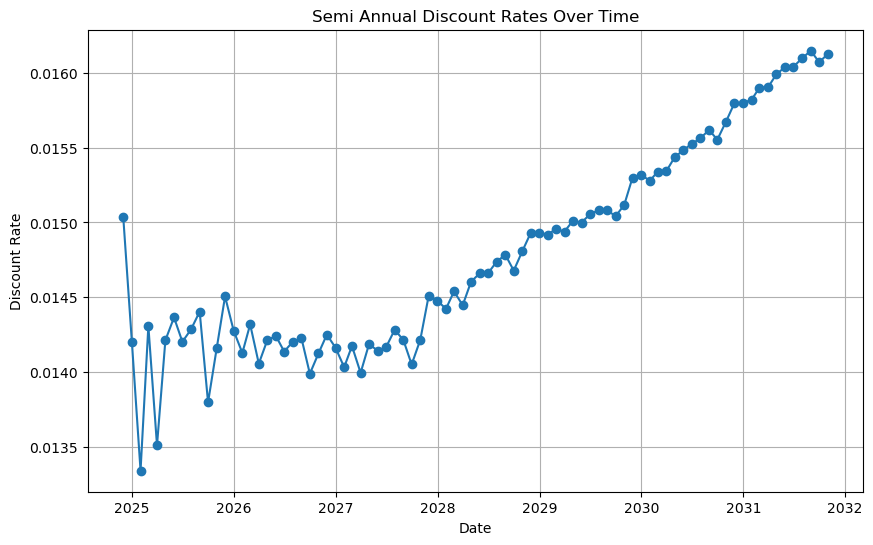

In [156]:
plt.figure(figsize=(10, 6))
plt.plot(discount_factors.index, semi_annual_rate, marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Discount Rate')
plt.title('Semi Annual Discount Rates Over Time')
plt.grid(True)
plt.show()

### 2.3. EXTRA (not graded)

Re-do `2.2.`, but this time use Weighted Least Squares. Find a weighting scheme that puts more weight on more recently issued treasures and less weight on less recently issued treasures. 

Does your answer change much?


### 2.4. Curve-Fitting

Continue with the model of cashflows (having filtered out some treasuries).

Estimate the discount curve via the Nelson-Siegel model.
* Fit via minimizing the sum of squared errors of the modeled prices against the quoted prices.
* Consider using `minimize` from `scipy.optimize`.

When done,
* Report the estimated NS parameters.
* Plot the semiannually-compounded discount rates along with those estimated with OLS from above.

***

# 3. Yield-Curve Factors

### Data
This section uses data in `'../data/yields.xlsx`.



### 3.1. Yield Curve Movements

Use the yield curve time-series data to calculate the time-series of the **level**, **slope**, and **curvature** factors.

Calculate the yield-curve factors. For each point in time, calculate the following three factors:

$\begin{align}
x^{\text{level}}_t =& \frac{1}{N_{\text{yields}}}\sum_{i=1}^{N_{\text{yields}}} y^{(i)}_t\\
x^{\text{slope}}_t =& y^{(30)}_t - y^{(1)}_t\\
x^{\text{curvature}}_t =& -y^{(1)}_t + 2 y^{(10)}_t - y^{(30)}_t
\end{align}$

Report the 
* correlation matrix of the factors.
* *mean and volatility of the factors.

### 3.2. PCA

Calculate the principal components of the time-series yield data.

Report...
* the percentage of total variation explained by each factor.
* the loadings of the first two PCA factors.

#### Note
Consider using,
`PCA` from `sklearn.decomposition` 

### 3.3. Comparison

Compare the ad-hoc factors from `3.1.` with the PCA-estimated factors in `3.2.`.

Estimate the correlation of the ad-hoc level factor with the PCA-1. And the slope factor with PCA-2.